3. Calcula, el nº de pedidos que llegan tarde por ciudad, el porcentaje que representa respecto al total de pedidos por ciudad, junto con el tiempo medio de dias que se pasan de fecha, queremos que a la hora de representar esta falla salga ya autodiagnosticada con la razon mas probable del problema (Analiza el dataset)

In [92]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
# Tablas a usar > olist_order_customer Y olist_orders_dataset
# Obtención del csv olist_order_customer_dataset
olist_order_customer = pd.read_csv ('../datasets_limpios/olist_order_customer.csv')
olist_order_customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,sp
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,sp
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,sp
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,sp
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,sp
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,sp
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,sp
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,ce
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,rs


In [94]:
# Obtención del csv olist_orders_dataset
olist_orders_dataset = pd.read_csv ('../datasets_limpios/olist_orders_dataset.csv')
olist_orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8 days 05:13:56
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22 days 04:38:58
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24 days 20:37:34
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17 days 02:04:27


In [95]:
# Juntar las dos tablas con un merge
merge_tablas = pd.merge(olist_order_customer, olist_orders_dataset, on="customer_id")
merge_tablas

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_entrega
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,sp,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,8 days 19:30:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,sp,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,16 days 15:52:55
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,sp,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,26 days 01:51:06
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,sp,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,14 days 23:57:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,sp,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,11 days 11:04:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,sp,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,6 days 04:18:20
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,sp,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,7 days 10:34:23
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,ce,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,30 days 22:51:25
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,rs,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,12 days 22:50:06


In [96]:
merge_tablas.dtypes

customer_id                      object
customer_unique_id               object
customer_zip_code_prefix          int64
customer_city                    object
customer_state                   object
order_id                         object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
tiempo_entrega                   object
dtype: object

In [97]:
# Calcula el nº de pedidos que llegan tarde por ciudad, 
# el porcentaje que representa respecto al total de pedidos por ciudad, 
# junto con el tiempo medio de dias que se pasan de fecha

# pasar a formato datetime las fechas
merge_tablas["order_delivered_customer_date"] = pd.to_datetime(merge_tablas["order_delivered_customer_date"])
merge_tablas["order_estimated_delivery_date"] = pd.to_datetime(merge_tablas["order_estimated_delivery_date"])

# calcular retraso
merge_tablas["dias_retraso"] = (merge_tablas["order_delivered_customer_date"] - merge_tablas["order_estimated_delivery_date"]).dt.days

# filtrar los que llegan tarde
pedidos_tarde = merge_tablas[merge_tablas["dias_retraso"] > 0]

# calcular num pedidos por ciudad
pedidos_por_ciudad = merge_tablas.groupby("customer_city")["order_delivered_customer_date"].count()

df_resultados = pedidos_tarde.groupby("customer_city").agg(
    num_pedidos_tarde=("dias_retraso", "count"),
    tiempo_medio_retraso=("dias_retraso", "mean")
).reset_index()

# calcular porcentaje
porcentaje_tarde = []
for ciudad in df_resultados["customer_city"]:
    total_pedidos = pedidos_por_ciudad.loc[ciudad]
    pedidos_tardios = df_resultados.loc[df_resultados["customer_city"] == ciudad, "num_pedidos_tarde"].values[0]
    porcentaje_tarde.append((pedidos_tardios / total_pedidos) * 100)

df_resultados["porcentaje_tarde"] = porcentaje_tarde

df_resultados

,customer_city,num_pedidos_tarde,tiempo_medio_retraso,porcentaje_tarde
0,abaete,1,2.000000,8.333333
1,abaetetuba,3,8.666667,27.272727
2,abaiara,1,12.000000,50.000000
3,abelardo luz,1,17.000000,16.666667
4,acarau,5,13.000000,62.500000
...,...,...,...,...
1184,werneck,1,18.000000,50.000000
1185,xangri-la,1,24.000000,12.500000
1186,xaxim,2,3.000000,20.000000
1187,xinguara,2,33.000000,22.222222


In [98]:
pedidos_tarde["customer_id"]

2        4e7b3e00288586ebd08712fdd0374a03
18       9b8ce803689b3562defaad4613ef426f
59       a905baa530258422594f1b05615bd225
89       6bed27564bd99d78d09c1fac13da56fd
96       23e96758fd640560e9b1fbcda90abfc4
                       ...               
99406    d9110683c7a282144e9fc97660026a28
99417    b7c889215de76857c7967c1011125d2d
99425    0a7db3996b88954c7aa763b5dd621d5b
99429    1ed0c832c2dd99570a59260e71768bdf
99438    5e28dfe12db7fb50a4b2f691faecea5e
Name: customer_id, Length: 6535, dtype: object

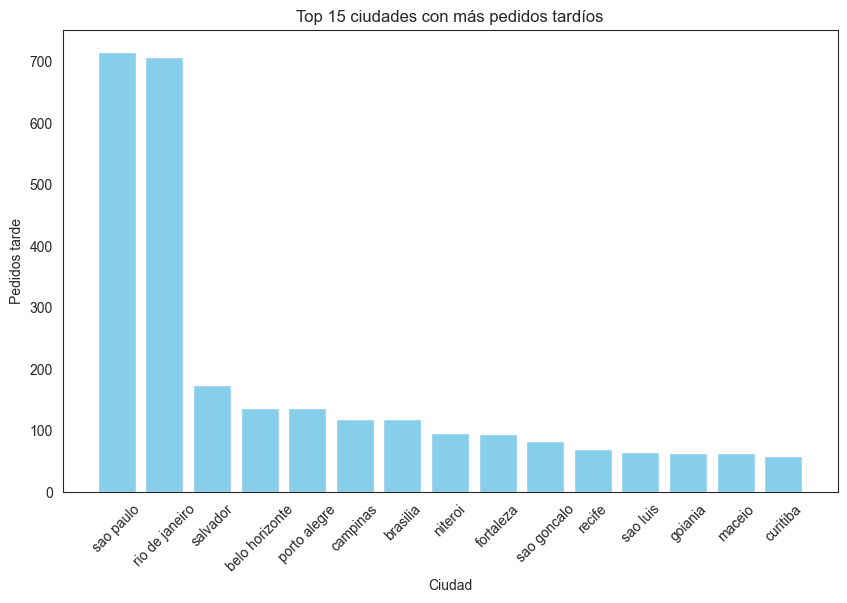

In [99]:
# Ordenar y seleccionar los mas representativos
df_resultado_ciudades_ = df_resultados.sort_values(by="num_pedidos_tarde", ascending=False).head(15)

# gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_resultado_ciudades_["customer_city"], df_resultado_ciudades_["num_pedidos_tarde"], color="skyblue")
plt.xlabel("Ciudad")
plt.ylabel("Pedidos tarde")
plt.title("Top 15 ciudades con más pedidos tardíos")
plt.xticks(rotation=45)
plt.show()

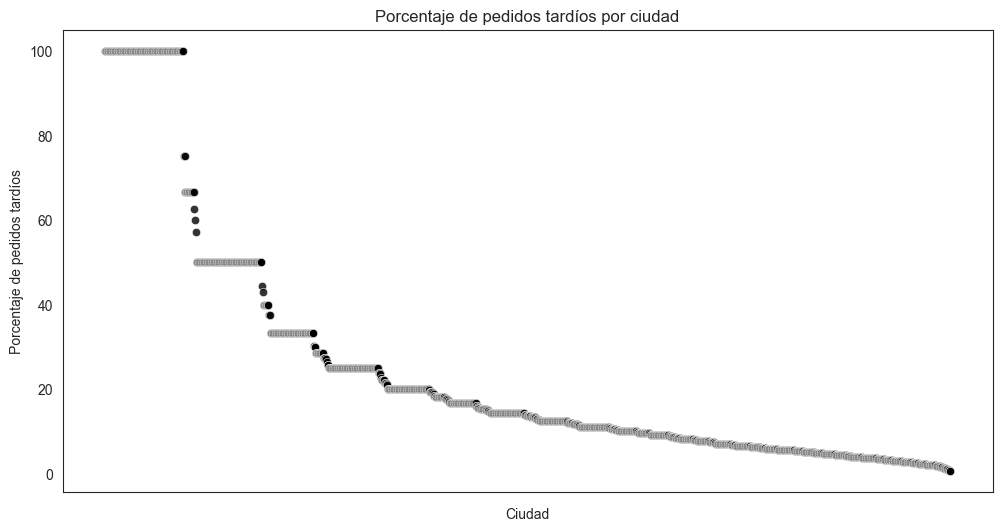

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar datos
df_resultado_porcentaje_tarde = df_resultados.sort_values(by="porcentaje_tarde", ascending=False)

# Establecer fondo completamente blanco
sns.set_style("white")

# Crear figura
fig, ax = plt.subplots(figsize=(12, 6))

# Crear gráfico de dispersión con puntos negros
sns.scatterplot(data=df_resultado_porcentaje_tarde, x="customer_city", y="porcentaje_tarde", color="black", alpha=0.8, ax=ax)

# Etiquetas
ax.set_xlabel("Ciudad")
ax.set_ylabel("Porcentaje de pedidos tardíos")
ax.set_title("Porcentaje de pedidos tardíos por ciudad")

# Ocultar etiquetas del eje X si hay demasiadas ciudades
ax.set_xticklabels([])

# Mostrar gráfico
plt.show()


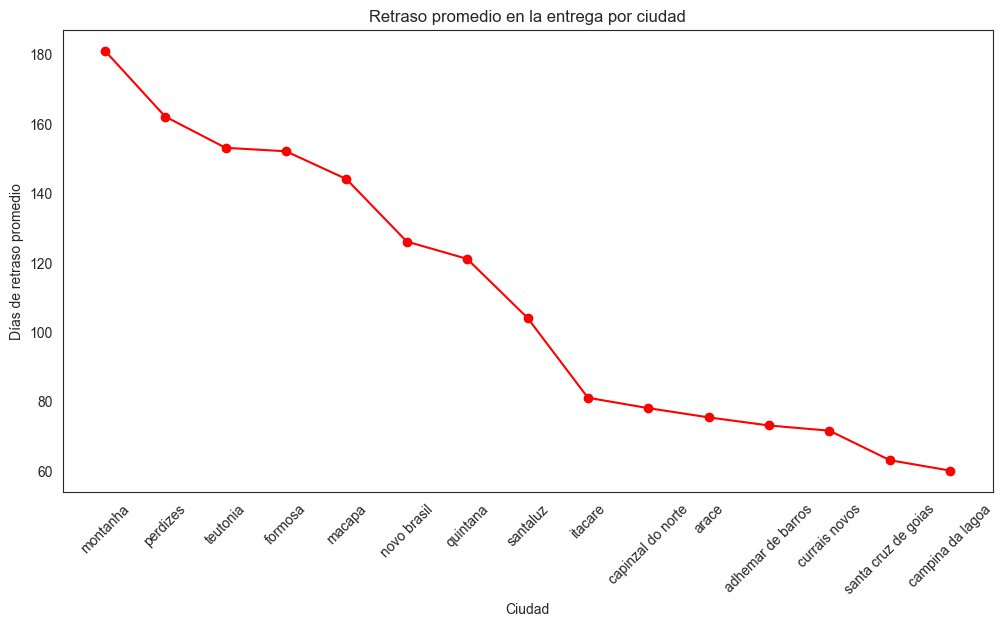

In [101]:
# gráfico de líneas
df_resultado_tiempo_medio_retraso = df_resultados.sort_values(by="tiempo_medio_retraso", ascending=False).head(15)

plt.figure(figsize=(12, 6))
plt.plot(df_resultado_tiempo_medio_retraso["customer_city"], df_resultado_tiempo_medio_retraso["tiempo_medio_retraso"], marker="o", color="red", linestyle="-")
plt.xlabel("Ciudad")
plt.ylabel("Días de retraso promedio")
plt.title("Retraso promedio en la entrega por ciudad")
plt.xticks(rotation=45)
plt.show()